# REALTY RATE
## Real Estate Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Here, We will convert our csv dataset to python dataframe.
df = pd.read_csv('USA_Data.csv')

In [3]:
# Printing first five rows of the dataframe.
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
# Printing Number of Rows and Columns in our dataframe.
df.shape

(904966, 10)

In [5]:
# Printing Brief summary of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [6]:
# Finding Number of Unique Values in each column. 
df.nunique()

status               2
bed                 43
bath                39
acre_lot          3257
city              2487
state               18
zip_code          3140
house_size        6344
prev_sold_date    9870
price             7137
dtype: int64

# Data pre-processing

<Axes: >

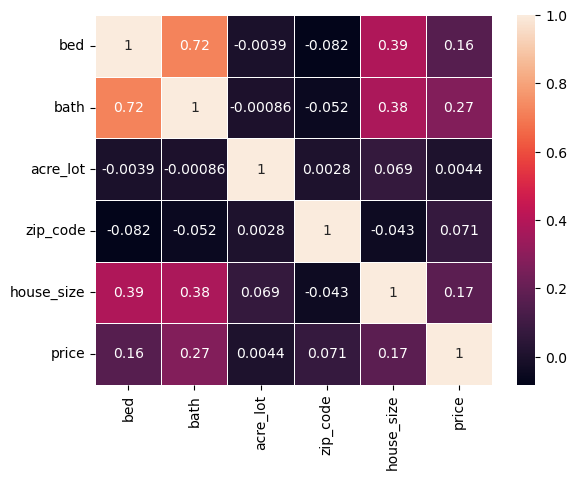

In [7]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

In [8]:
# Dropping Unwanted Columns.
data = df.drop(columns=['status','acre_lot', 'zip_code', 'prev_sold_date'])
data

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,Mayaguez,Puerto Rico,NaN,65000.0
...,...,...,...,...,...,...
904961,2.0,2.0,New York City,New York,NaN,359000.0
904962,2.0,2.0,Bronx,New York,1200.0,299000.0
904963,NaN,1.0,Bronx,New York,NaN,120000.0
904964,3.0,2.0,Bronx,New York,NaN,449000.0


In [9]:
# Printing a detailed summary of our dataframe.
data.describe()

,bed,bath,house_size,price
count,775126.000000,791082.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,2.138437e+03,8.774382e+05
std,2.065312,1.931622,3.046600e+03,2.457698e+06
min,1.000000,1.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,1.450112e+06,8.750000e+08


In [10]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed           129840
bath          113884
city              72
state              0
house_size    292886
price             71
dtype: int64

In [11]:
# Drop rows with null values in the 'city' column
data = data.dropna(subset=['city','price'])

In [12]:
city_count=data['city'].value_counts()
city_count

New York City    47502
New York         46432
Boston           31502
Brooklyn         22690
Philadelphia     10416
                 ...  
Mahopac              1
Carmel Hamlet        1
Riverhead            1
Sunset Park          1
North Salem          1
Name: city, Length: 2487, dtype: int64

In [13]:
#Dropping the cities that contain the data < 20
data=data.drop(data[data['city'].map(city_count) <= 20].index)
data['city'].unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'New Hyde Park',
       'Manhasset', 'Armonk'], dtype=object)

### So, now lets handle missing values in house_size, bed, bath

In [14]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed           128776
bath          112626
city               0
state              0
house_size    291340
price              0
dtype: int64

In [15]:
# Calculate the median house size for each city
city_mean_house_size = data.groupby('city')['house_size'].transform('median')

# Fill the missing values
data['house_size'].fillna(city_mean_house_size, inplace=True)

In [16]:
# Calculate the median bed for each city
city_mean_house_size = data.groupby('city')['bed'].transform('median')

# Fill the missing values 
data['bed'].fillna(city_mean_house_size, inplace=True)

In [17]:
# Calculate the median bath for each city
city_mean_house_size = data.groupby('city')['bath'].transform('median')

# Fill the missing values
data['bath'].fillna(city_mean_house_size, inplace=True)

In [18]:
data.isnull().sum()

bed            806
bath           844
city             0
state            0
house_size    4973
price            0
dtype: int64

In [19]:
# Drop rows with null values remaining in the 'house_size' , 'bath', 'bed' column
data = data.dropna(subset=['house_size','bed','bath'])

### Saving Cleaned dataset

data.to_csv('Cleaned_data.csv', index=False)

# Exploratory Data Analysis

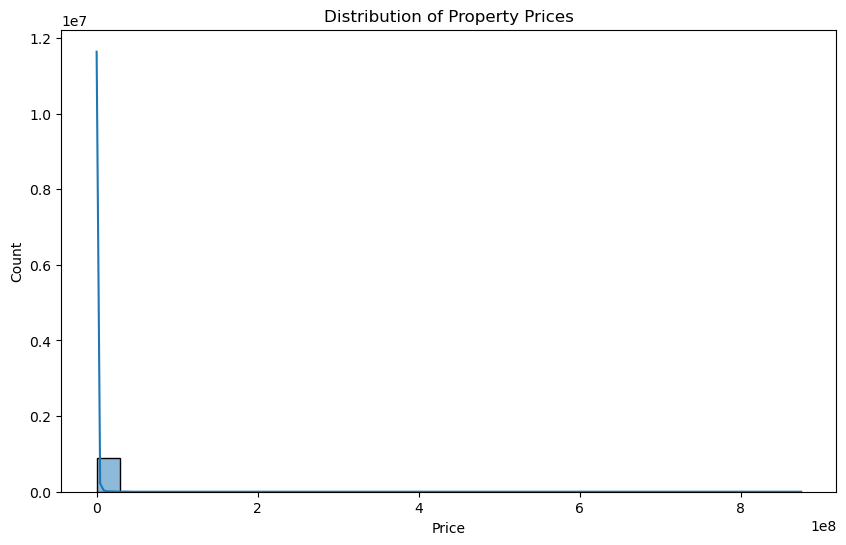

In [20]:
# Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

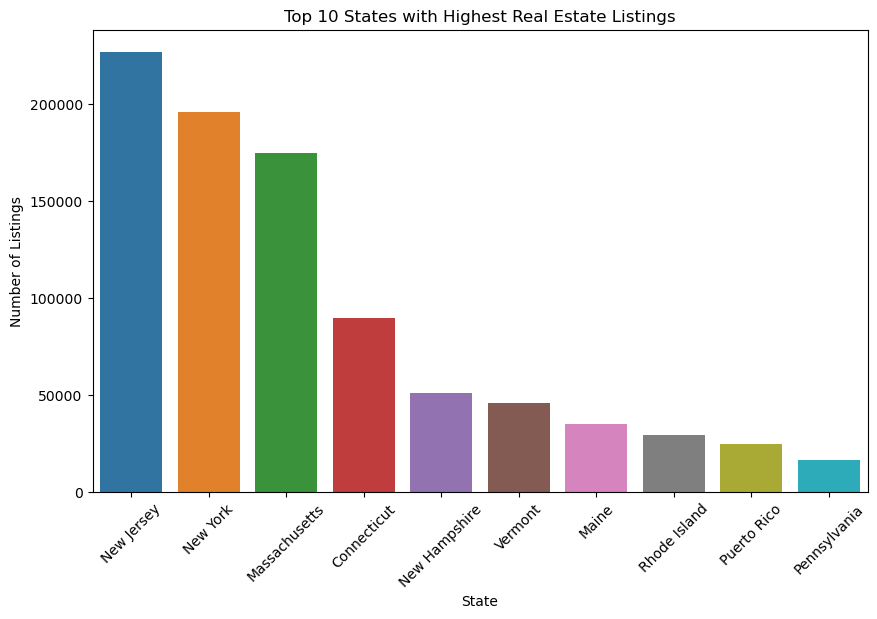

In [21]:
top_states = data['state'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with Highest Real Estate Listings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

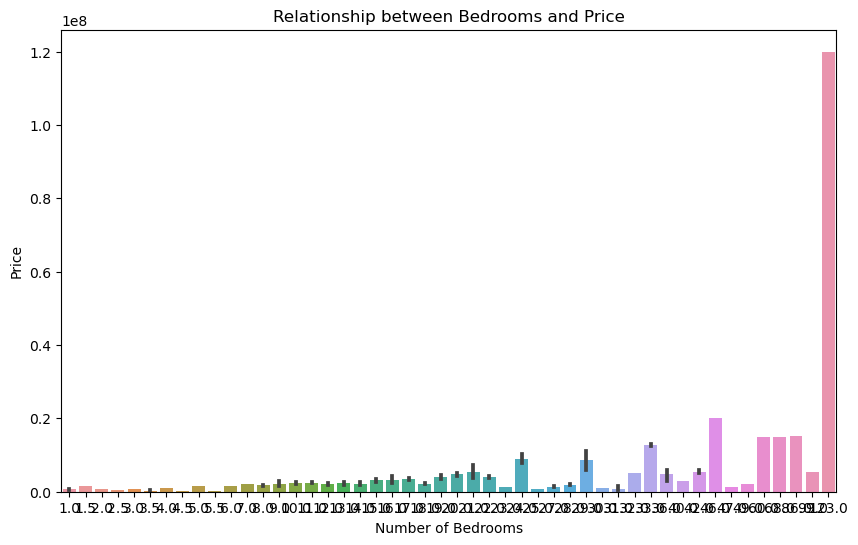

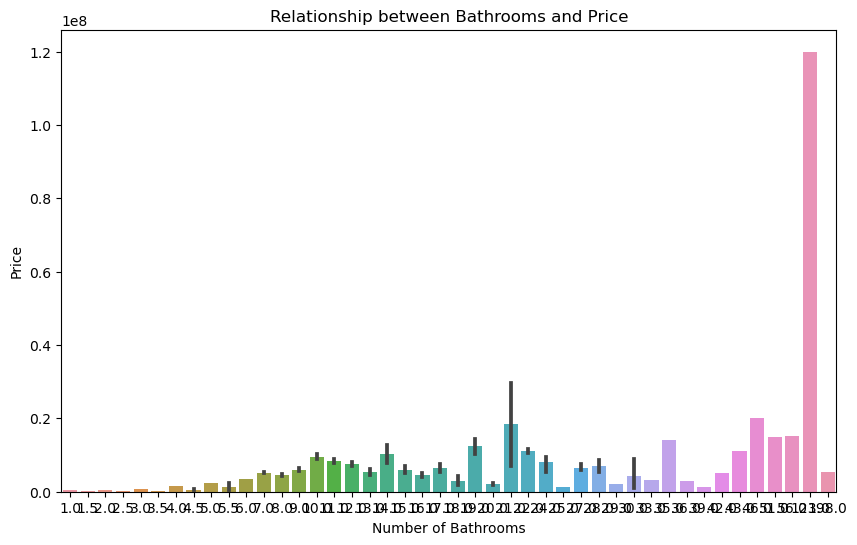

In [22]:
# Number of rooms and price 
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bed', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Number of bedrooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bath', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price', ylabel='state'>

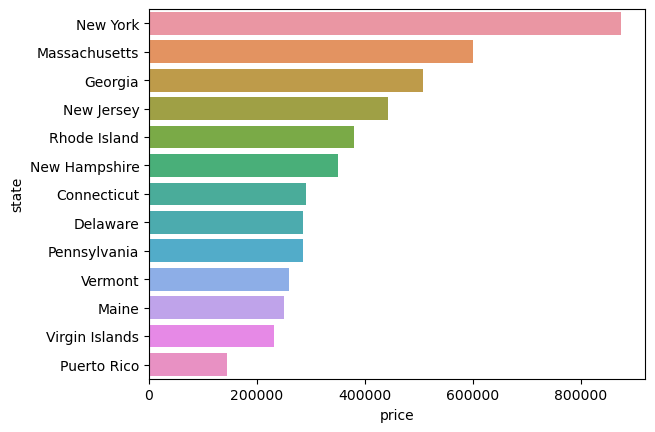

In [23]:
df1 = data.groupby('state', as_index=False)['price'].median().sort_values('price', ascending=False)
sns.barplot(data = df1, x = 'price', y = 'state')

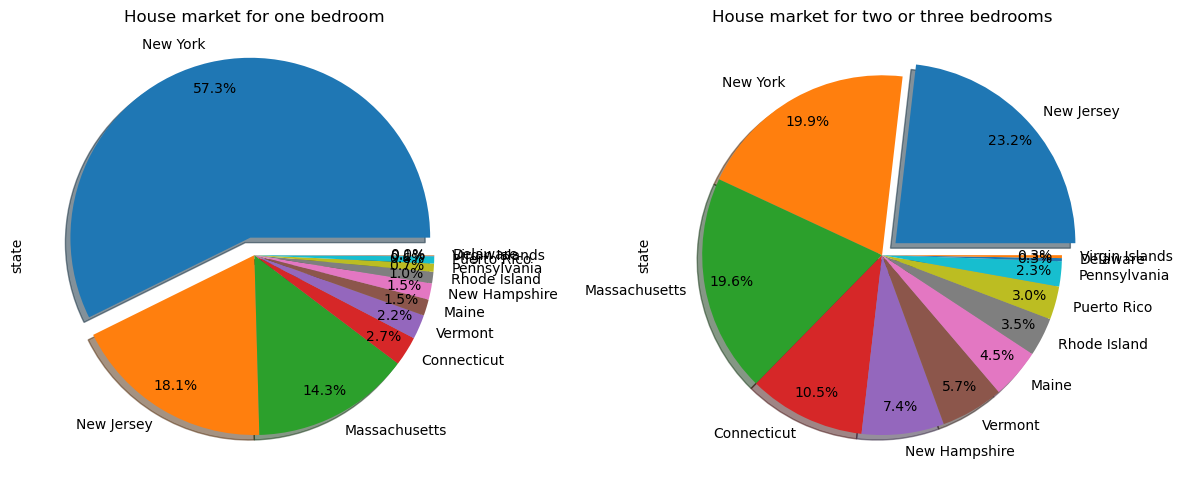

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for one-bedroom houses
data_1bed = data[data['bed'] == 1]['state'].value_counts()
explode_1bed = [0.1 if count == data_1bed.max() else 0 for count in data_1bed]
data_1bed.plot.pie(ax=ax[0,], title='House market for one bedroom', autopct='%1.1f%%', pctdistance=0.85, explode=explode_1bed, shadow=True)

# Plot for two or three-bedroom houses
data_2or3bed = data[data['bed'].isin([2, 3])]['state'].value_counts()
explode_2or3bed = [0.1 if count == data_2or3bed.max() else 0 for count in data_2or3bed]
data_2or3bed.plot.pie(ax=ax[1], title='House market for two or three bedrooms', autopct='%1.1f%%', pctdistance=0.85, explode=explode_2or3bed, shadow=True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['state_numeric'] = label_encoder.fit_transform(data['state'])
data = data.drop("state", axis=1)
data

In [ ]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

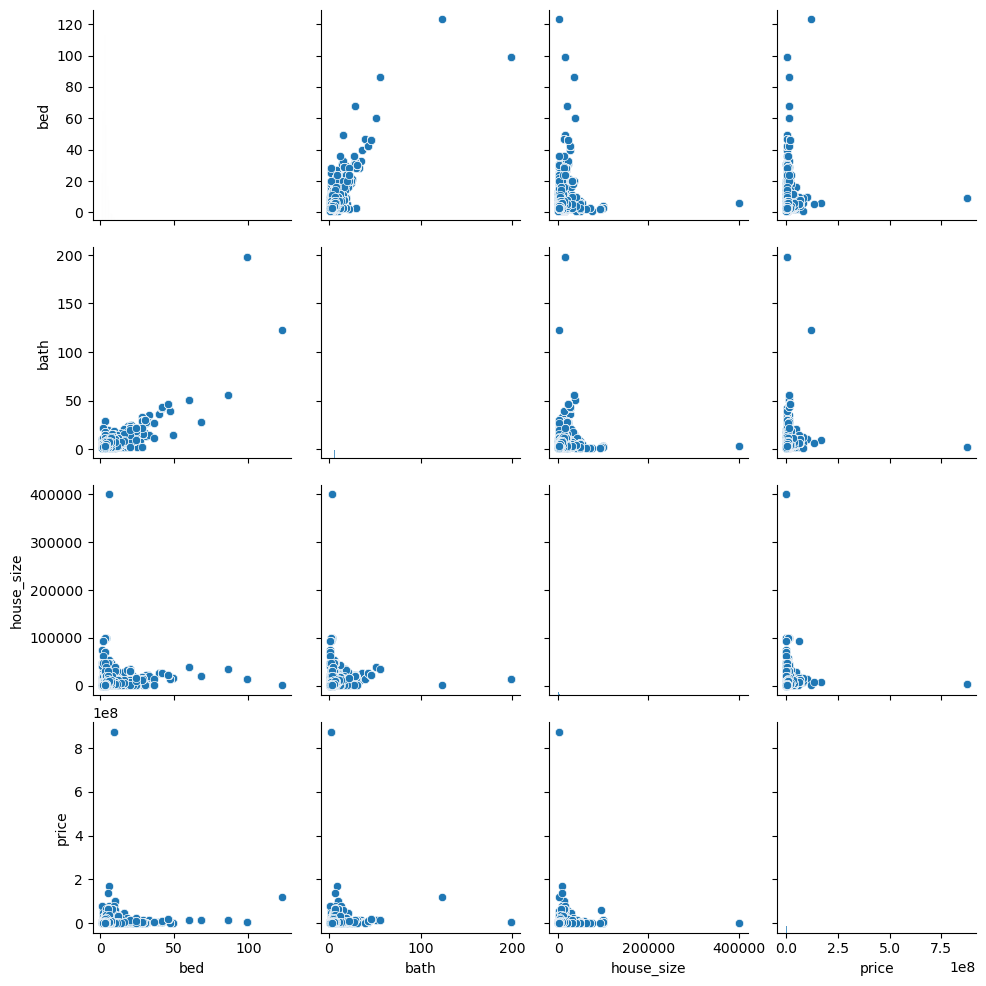

In [25]:
sns.pairplot(data)

C:\Users\Jashanpreet Singh\AppData\Local\Temp\ipykernel_10728\1795738006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=0.5);


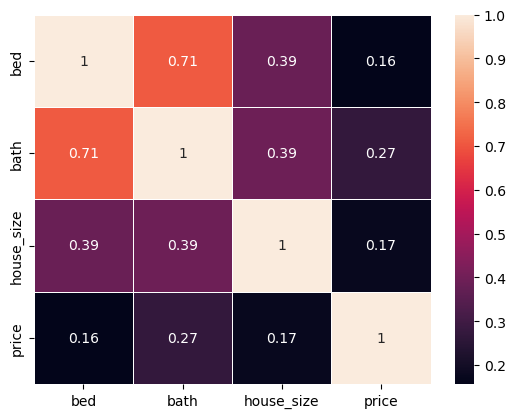

In [26]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5);

In [27]:
data.describe()

,bed,bath,house_size,price
count,895308.000000,895308.000000,895308.000000,8.953080e+05
mean,3.288008,2.461319,2086.364255,8.768568e+05
std,1.936443,1.821842,2355.493467,2.465092e+06
min,1.000000,1.000000,100.000000,0.000000e+00
25%,2.000000,2.000000,1219.000000,2.690000e+05
50%,3.000000,2.000000,1662.000000,4.750000e+05
75%,4.000000,3.000000,2348.000000,8.299000e+05
max,123.000000,198.000000,400149.000000,8.750000e+08


# Model Training


In [28]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['state', 'city']
for col in categorical_cols:
    label_encoders = {}
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [26]:
from sklearn.preprocessing import StandardScaler

# Identify columns for standardization
cols_to_standardize = ['bed', 'bath', 'house_size']

# Exclude the target variable ('price') from standardization
if 'price' in cols_to_standardize:
    cols_to_standardize.remove('price')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform the selected columns
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])


C:\Users\Jashanpreet Singh\AppData\Local\Temp\ipykernel_21480\3598909771.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])


In [30]:
data

,bed,bath,city,state,house_size,price
0,3.0,2.0,9,9,920.0,105000.0
1,4.0,2.0,9,9,1527.0,80000.0
2,2.0,1.0,782,9,748.0,67000.0
3,4.0,2.0,1297,9,1800.0,145000.0
4,6.0,2.0,954,9,1475.0,65000.0
...,...,...,...,...,...,...
904961,2.0,2.0,1111,7,1240.0,359000.0
904962,2.0,2.0,204,7,1200.0,299000.0
904963,3.0,1.0,204,7,1400.0,120000.0
904964,3.0,2.0,204,7,1400.0,449000.0


In [31]:
dependent='price'
independent=data.columns.tolist()
independent.remove(dependent)
x=data[independent].values
y=data[dependent].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=data['city'],random_state=42)

In [33]:
random_forest=RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.9590249393411531


In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 100937.4750015187
Mean Squared Error: 321427907043.62396
Root Mean Squared Error: 566946.1235810894


from joblib import dump
dump(random_forest, 'model.joblib')